In [2]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime

In [3]:
cpi_df = pd.read_csv("Datasets/CPI_csv.csv")

cpi_df.tail()

,Year,"Consumer Price Index, All items",Food and non-alcoholic beverages,"Alcoholic Beverages, Tobacco, and Narcotics",Clothing and footwear,"Housing, Water, Electricity, Gas and Other Fuels","Furnishings, household equipment and routine household maintenance",Health,Transport,Communication,...,"Clothing and footwear, Weight","Housing, Water, Electricity, Gas and Other Fuels, Weight","Furnishings, household equipment and routine household maintenance, Weight","Health, Weight","Transport, Weight","Communication, Weight","Recreation and culture, Weight","Education, Weight","Restaurants and hotels, Weight","Miscellaneous goods and services, Weight"
32,2/3/2022,130.11,127.22,137.72,108.57,137.82,110.31,134.01,126.20,94.79,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
33,2/4/2022,131.85,129.11,138.34,109.38,138.59,111.17,134.42,132.52,94.17,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
34,2/5/2022,132.59,130.87,138.82,108.06,139.31,111.92,134.60,133.79,94.01,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
35,2/6/2022,134.05,132.66,139.46,107.82,140.57,112.32,134.86,138.06,93.84,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
36,2/7/2022,135.89,133.90,140.21,107.53,142.15,113.15,135.40,143.74,93.66,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98


In [4]:

#DatetimeIndex(cpi_df["Year"])
x_vals = pd.date_range(start='6/19/2019',end='6/19/2022',periods=len(cpi_df))
cpi_df['Year'] = x_vals
print(x_vals)

#date_time_str = cpi_df["Year"] 

#date_time_str
#for i in date_time_str:
#    print(type(i))
#    i = datetime.strptime(i,'%m/%d/%y')
#    print(i)
#date_time_obj = datetime.strptime(date_time_str, '%d/%m/%y')

DatetimeIndex(['2019-06-19 00:00:00', '2019-07-19 10:40:00',
               '2019-08-18 21:20:00', '2019-09-18 08:00:00',
               '2019-10-18 18:40:00', '2019-11-18 05:20:00',
               '2019-12-18 16:00:00', '2020-01-18 02:40:00',
               '2020-02-17 13:20:00', '2020-03-19 00:00:00',
               '2020-04-18 10:40:00', '2020-05-18 21:20:00',
               '2020-06-18 08:00:00', '2020-07-18 18:40:00',
               '2020-08-18 05:20:00', '2020-09-17 16:00:00',
               '2020-10-18 02:40:00', '2020-11-17 13:20:00',
               '2020-12-18 00:00:00', '2021-01-17 10:40:00',
               '2021-02-16 21:20:00', '2021-03-19 08:00:00',
               '2021-04-18 18:40:00', '2021-05-19 05:20:00',
               '2021-06-18 16:00:00', '2021-07-19 02:40:00',
               '2021-08-18 13:20:00', '2021-09-18 00:00:00',
               '2021-10-18 10:40:00', '2021-11-17 21:20:00',
               '2021-12-18 08:00:00', '2022-01-17 18:40:00',
               '2022-02-

In [5]:
cpi_df = cpi_df.set_index(cpi_df["Year"])
cpi_df

del cpi_df["Year"]


In [6]:
all_start = cpi_df.iloc[0,0]
all_end = cpi_df.iloc[36,0]
# ---------------------------
foodbev_start = cpi_df.iloc[0,1]
foodbev_end = cpi_df.iloc[36,1]
# -----------------------------
alcoholnarcs_start = cpi_df.iloc[0,2]
alcoholnarcs_end = cpi_df.iloc[36,2]
# -------------------------------
clothes_start = cpi_df.iloc[0,3]
clothes_end = cpi_df.iloc[36,3]
# -------------------------------
utility_start = cpi_df.iloc[0,4]
utility_end = cpi_df.iloc[36,4]
# --------------------------------
house_equip_start = cpi_df.iloc[0,5]
house_equip_end = cpi_df.iloc[36,5]
# --------------------------------
health_start = cpi_df.iloc[0,6]
health_end = cpi_df.iloc[36,6]
# --------------------------------
transportation_start = cpi_df.iloc[0,7]
transportation_end = cpi_df.iloc[36,7]
# --------------------------------
recreation_start = cpi_df.iloc[0,9]
recreation_end = cpi_df.iloc[36,9]


#Increase = New Number - Original Number/original number

#cpi_df.iloc[row,column]

cpi_all_change = ((all_end - all_start)/(all_start)) * 100
foodbev_change = ((foodbev_end - foodbev_start)/(foodbev_start)) * 100
alcoholnarcs_change = ((alcoholnarcs_end - alcoholnarcs_start)/(alcoholnarcs_start)) * 100
clothes_change = ((clothes_end - clothes_start)/(clothes_start)) * 100
utility_change = ((utility_end - utility_start)/(utility_start)) * 100
house_equip_change = ((house_equip_end - house_equip_start)/(house_equip_start)) * 100
health_change = ((health_end - health_start)/(health_start)) * 100
transportation_change = ((transportation_end - transportation_start)/(transportation_start)) * 100
recreation_change = ((recreation_end - recreation_start)/(recreation_start)) * 100

print (f"The percent increase of CPI overall: % {cpi_all_change:.2f}")
print (f"The percent increase of CPI Food & Bev: % {foodbev_change:.2f}")
print (f"The percent increase of CPI Alcohol & Narcotics: % {alcoholnarcs_change:.2f}")
print (f"The percent increase of CPI Clothes: % {clothes_change:.2f}")
print (f"The percent increase of CPI Utilities: % {utility_change:.2f}")
print (f"The percent increase of CPI House Equipment & Maintenance: % {house_equip_change:.2f}")
print (f"The percent increase of CPI Healthcare: % {health_change:.2f}")
print (f"The percent increase of CPI Transportation: % {transportation_change:.2f}")
print (f"The percent increase of CPI Recreation: % {recreation_change:.2f}")



The percent increase of CPI overall: % 15.68
The percent increase of CPI Food & Bev: % 19.70
The percent increase of CPI Alcohol & Narcotics: % 13.91
The percent increase of CPI Clothes: % 3.38
The percent increase of CPI Utilities: % 12.82
The percent increase of CPI House Equipment & Maintenance: % 15.79
The percent increase of CPI Healthcare: % 7.76
The percent increase of CPI Transportation: % 37.41
The percent increase of CPI Recreation: % 8.92


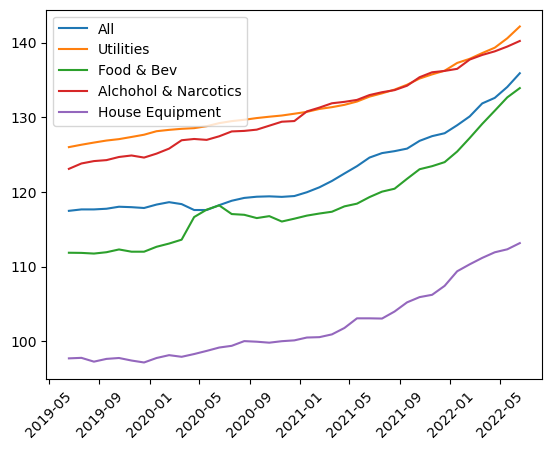

In [14]:
# Top performers vs. All
fig, ax = plt.subplots()


ax.plot(cpi_df["Consumer Price Index, All items"],label="CPI All items")
ax.plot(cpi_df["Housing, Water, Electricity, Gas and Other Fuels"],label="Utilities")
ax.plot(cpi_df["Food and non-alcoholic beverages"],label="Food & Bev")
ax.plot(cpi_df["Alcoholic Beverages, Tobacco, and Narcotics"],label="Alcohol & Narcotics")
ax.plot(cpi_df["Furnishings, household equipment and routine household maintenance"],label="Household Equipment")


plt.legend(["All","Utilities","Food & Bev","Alchohol & Narcotics","House Equipment"])
plt.xticks(rotation=45)
plt.show()


KeyError: 'Recreation & Culture'

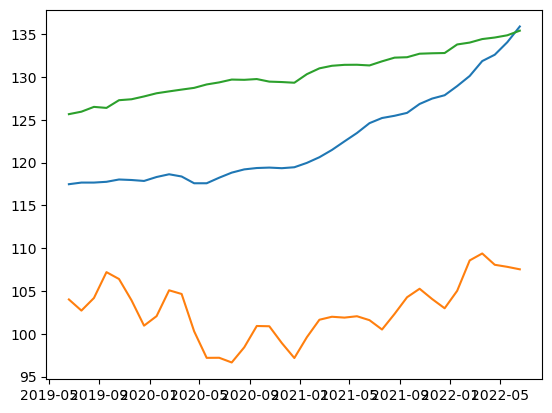

In [16]:
# Bottom Performers vs. All

fig, ax = plt.subplots()

ax.plot(cpi_df["Consumer Price Index, All items"],label="CPI All items")
ax.plot(cpi_df["Clothing and footwear"],label="Clothing")

ax.plot(cpi_df["Health"],label="Health")
ax.plot(cpi_df["Recreation & Culture"],label="Recreation")




plt.legend(["All","Clothing","Health","Recreation"])
plt.xticks(rotation=45)
plt.show()


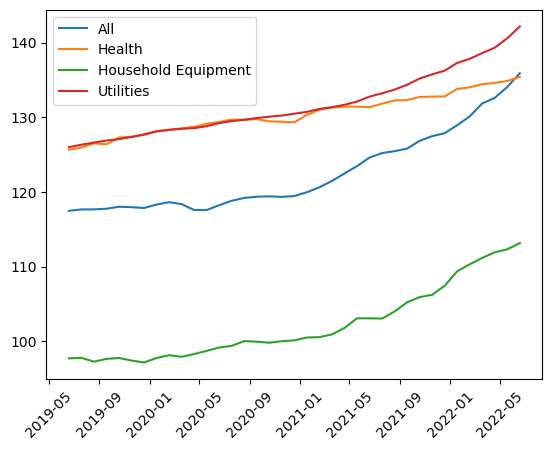

In [8]:
fig, ax = plt.subplots()
#plt.xticks(x_vals)
#ax.set_xticks(x_vals,minor=True)
#health_cpi = cpi_df["Health"]
#all_cpi = cpi_df["Consumer Price Index, All items"]
ax.plot(cpi_df["Consumer Price Index, All items"],label="CPI All items")
ax.plot(cpi_df["Health"],label="Health")
ax.plot(cpi_df["Furnishings, household equipment and routine household maintenance"],label="Household Equipment")
ax.plot(cpi_df["Housing, Water, Electricity, Gas and Other Fuels"],label="Utilities")

plt.legend(["All","Health","Household Equipment","Utilities"])
#ax.set_xticklabels(cpi_df.index, rotation=45)
#ax.set_xticks(cpi_df.index)
#cpi_df.head()
#cpi_df["Health"].plot(ax=axes[0,1])
#plt.plot(months,CPI_yvalues)

#plt.margins(0.2)
plt.xticks(rotation=45)
plt.show()



In [9]:


#print (f"The percent increase of CPI overall: % {cpi_all_change:.2f}")
#print (f"The percent increase of CPI Health: % {health_change:.2f}")
#print (f"The percent increase of CPI House Equipment: % {house_equip_change:.2f}")
#print (f"The percent increase of CPI Utilities: % {utility_change:.2f}")



cpi_df.tail()

,"Consumer Price Index, All items",Food and non-alcoholic beverages,"Alcoholic Beverages, Tobacco, and Narcotics",Clothing and footwear,"Housing, Water, Electricity, Gas and Other Fuels","Furnishings, household equipment and routine household maintenance",Health,Transport,Communication,Recreation and culture,...,"Clothing and footwear, Weight","Housing, Water, Electricity, Gas and Other Fuels, Weight","Furnishings, household equipment and routine household maintenance, Weight","Health, Weight","Transport, Weight","Communication, Weight","Recreation and culture, Weight","Education, Weight","Restaurants and hotels, Weight","Miscellaneous goods and services, Weight"
Year,,,,,,,,,,,,,,,,,,,,,
2022-02-17 05:20:00,130.11,127.22,137.72,108.57,137.82,110.31,134.01,126.20,94.79,110.01,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
2022-03-19 16:00:00,131.85,129.11,138.34,109.38,138.59,111.17,134.42,132.52,94.17,110.35,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
2022-04-19 02:40:00,132.59,130.87,138.82,108.06,139.31,111.92,134.60,133.79,94.01,110.39,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
2022-05-19 13:20:00,134.05,132.66,139.46,107.82,140.57,112.32,134.86,138.06,93.84,110.78,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98
2022-06-19 00:00:00,135.89,133.90,140.21,107.53,142.15,113.15,135.40,143.74,93.66,111.13,...,26.62,360.66,40.16,73.57,145.16,33.35,66.64,27.23,77.73,60.98


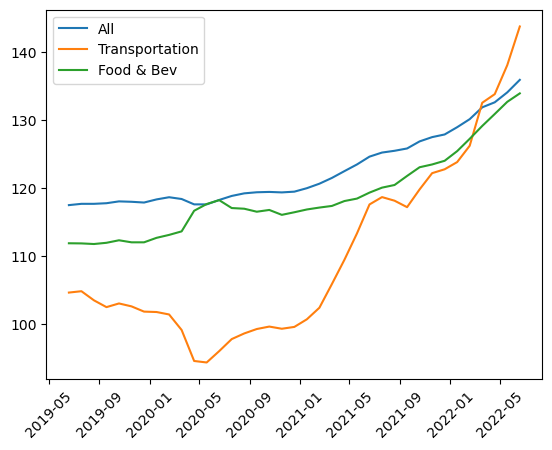

The percent increase of CPI overall: % 15.68
The percent increase of CPI Food & Bev: % 19.70
The percent increase of CPI Transportation: % 37.41


In [11]:

fig, ax = plt.subplots()

ax.plot(cpi_df["Consumer Price Index, All items"],label="CPI All items")
ax.plot(cpi_df["Transport"],label="Transport")
ax.plot(cpi_df["Food and non-alcoholic beverages"],label="Food & Bev")

plt.legend(["All","Transportation","Food & Bev"])
plt.xticks(rotation=45)

plt.show()
print (f"The percent increase of CPI overall: % {cpi_all_change:.2f}")
print (f"The percent increase of CPI Food & Bev: % {foodbev_change:.2f}")
print (f"The percent increase of CPI Transportation: % {transportation_change:.2f}")


# what happened Q1 2021?? 


C:\Users\Matthew\AppData\Local\Temp\ipykernel_21776\4144364446.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cpi_df.index, rotation=45)


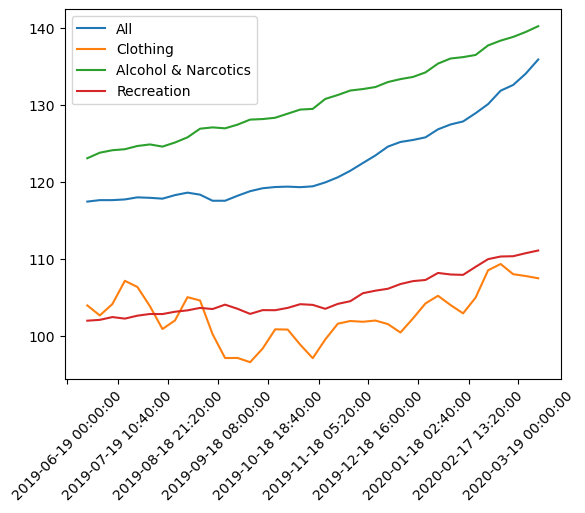

In [13]:
fig, ax = plt.subplots()

ax.plot(cpi_df["Consumer Price Index, All items"],label="CPI All items")
ax.plot(cpi_df["Clothing and footwear"],label="Clothing and Footwear")
ax.plot(cpi_df["Alcoholic Beverages, Tobacco, and Narcotics"],label="Alcohol & Narcotics")
ax.plot(cpi_df["Recreation and culture"],label="Recreation")

plt.legend(["All","Clothing","Alcohol & Narcotics","Recreation"])
ax.set_xticklabels(cpi_df.index, rotation=45)
plt.show()